<a href="https://colab.research.google.com/github/tharindatj/Kaggle_competitions/blob/backup/kaggle_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the start off modules and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.set_index('Id', inplace=True)

Initial Scan of Data

In [3]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

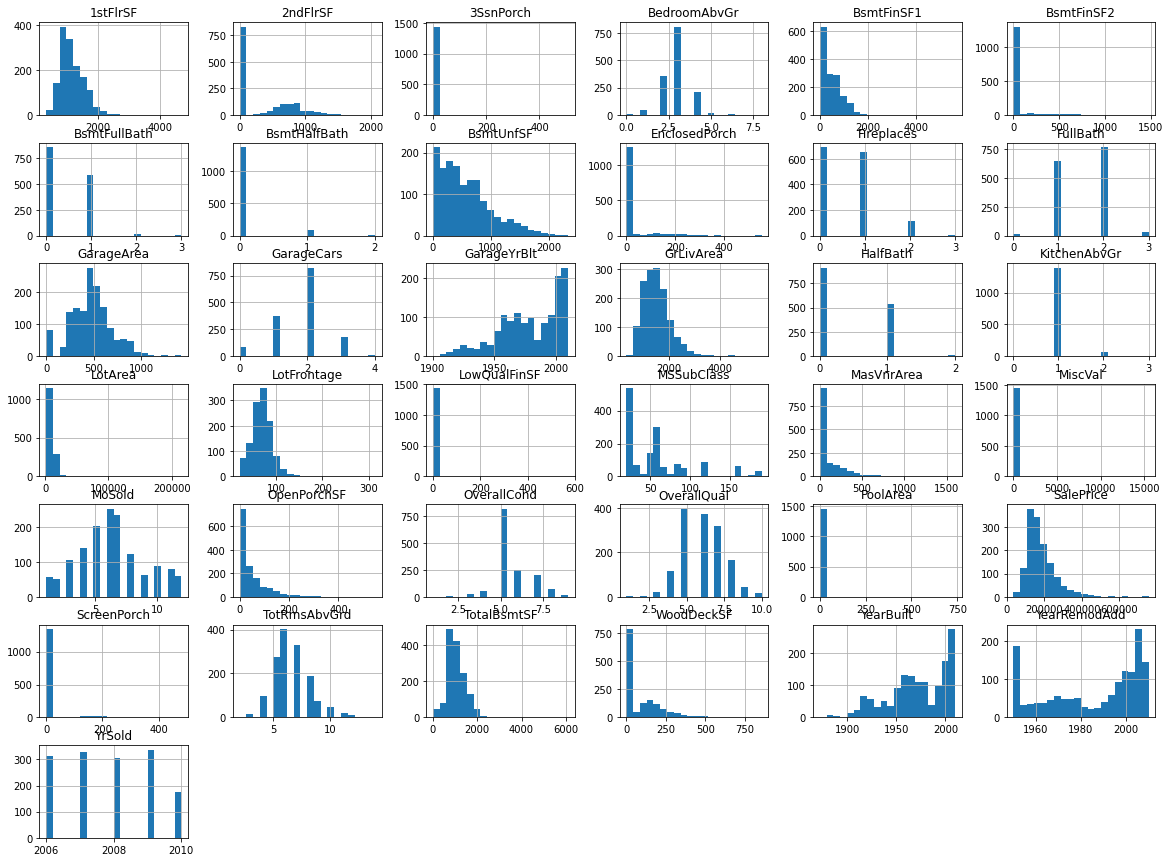

In [6]:
df.hist(bins=20, figsize=(20,15))
plt.show()

*Understand what data is missing and decide on strategy*

In [18]:
df_empty = df.columns[df.isnull().any()]

In [19]:
df_empty = df[df_empty]

In [20]:
df_empty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [21]:
df_empty.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


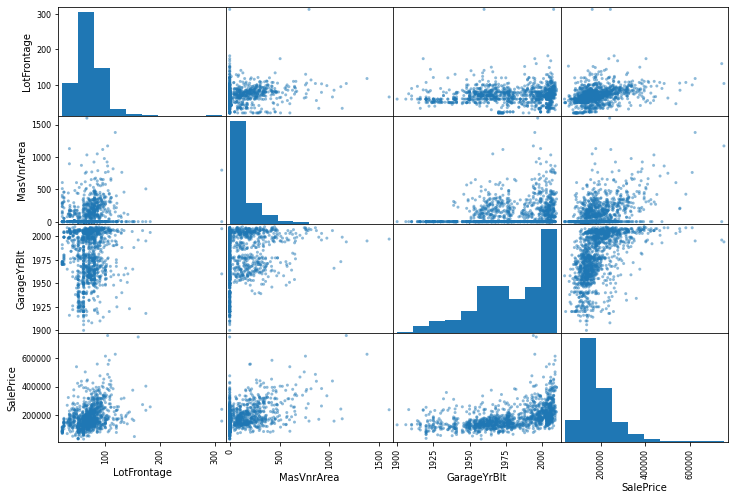

In [22]:
from pandas.plotting import scatter_matrix
df_empty = df_empty.join(df['SalePrice'])
scatter_matrix(df_empty, figsize=(12,8), diagonal='hist')
plt.show()

In [23]:
#missing values strategy
#na means absence of option in house - custom transformer
na_cat = ['Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

#for numerical empty values strategy=Median
median =['LotFrontage']

#for numerical empty values strategy=Constant
#GaragYrBlt, use oldest year = 1900 to enable adding feature - age of garage - no garage means zero age
constant = ['GarageYrBlt'] 

#for numerical and catetgorical variables stratege =most frequent
frequent_cat = ['MasVnrType','Electrical']
frequent_num = ['MasVnrArea']

#check all missing features are addressed
empty_cat_columns = na_cat + frequent_cat
all_missing_feat = empty_cat_columns + median + constant + frequent_num
len(all_missing_feat) == len(df_empty.columns) -1

True

In [156]:
#fill in empty data to facilitate data evaluation
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

df_fillempty = ColumnTransformer([('median', SimpleImputer(strategy='median'), median),
                                        ('constant', SimpleImputer(strategy='constant', fill_value=1900), constant),
                                        ('frequent', SimpleImputer(strategy='most_frequent'), frequent_num),
                                        ('na', SimpleImputer(strategy='constant', fill_value='na'),na_cat),
                                        ('cat_frequent', SimpleImputer(strategy='most_frequent'), frequent_cat)], 
                                       remainder='passthrough')

In [171]:
df_fill = df_fillempty.fit_transform(df)

In [159]:
fill_columns = ['LotFrontage','GarageYrBlt','MasVnrArea','Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','MasVnrType','Electrical']
column_list = list(df.columns)
passthrough_columns = [i for i in column_list if i not in fill_columns]
df_fill_columns = fill_columns + passthrough_columns
len(df_fill_columns)

80

In [182]:
df_fill = pd.DataFrame(df_fill, columns=df_fill_columns)
df_fill.index = df.index
df_fill = df_fill.apply(pd.to_numeric, errors='ignore')
df_fill.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   GarageYrBlt    1460 non-null   float64
 2   MasVnrArea     1460 non-null   float64
 3   Alley          1460 non-null   object 
 4   BsmtQual       1460 non-null   object 
 5   BsmtCond       1460 non-null   object 
 6   BsmtExposure   1460 non-null   object 
 7   BsmtFinType1   1460 non-null   object 
 8   BsmtFinType2   1460 non-null   object 
 9   FireplaceQu    1460 non-null   object 
 10  GarageType     1460 non-null   object 
 11  GarageFinish   1460 non-null   object 
 12  GarageQual     1460 non-null   object 
 13  GarageCond     1460 non-null   object 
 14  PoolQC         1460 non-null   object 
 15  Fence          1460 non-null   object 
 16  MiscFeature    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  Electric

##Data Exploration

Num Variables

Correlations

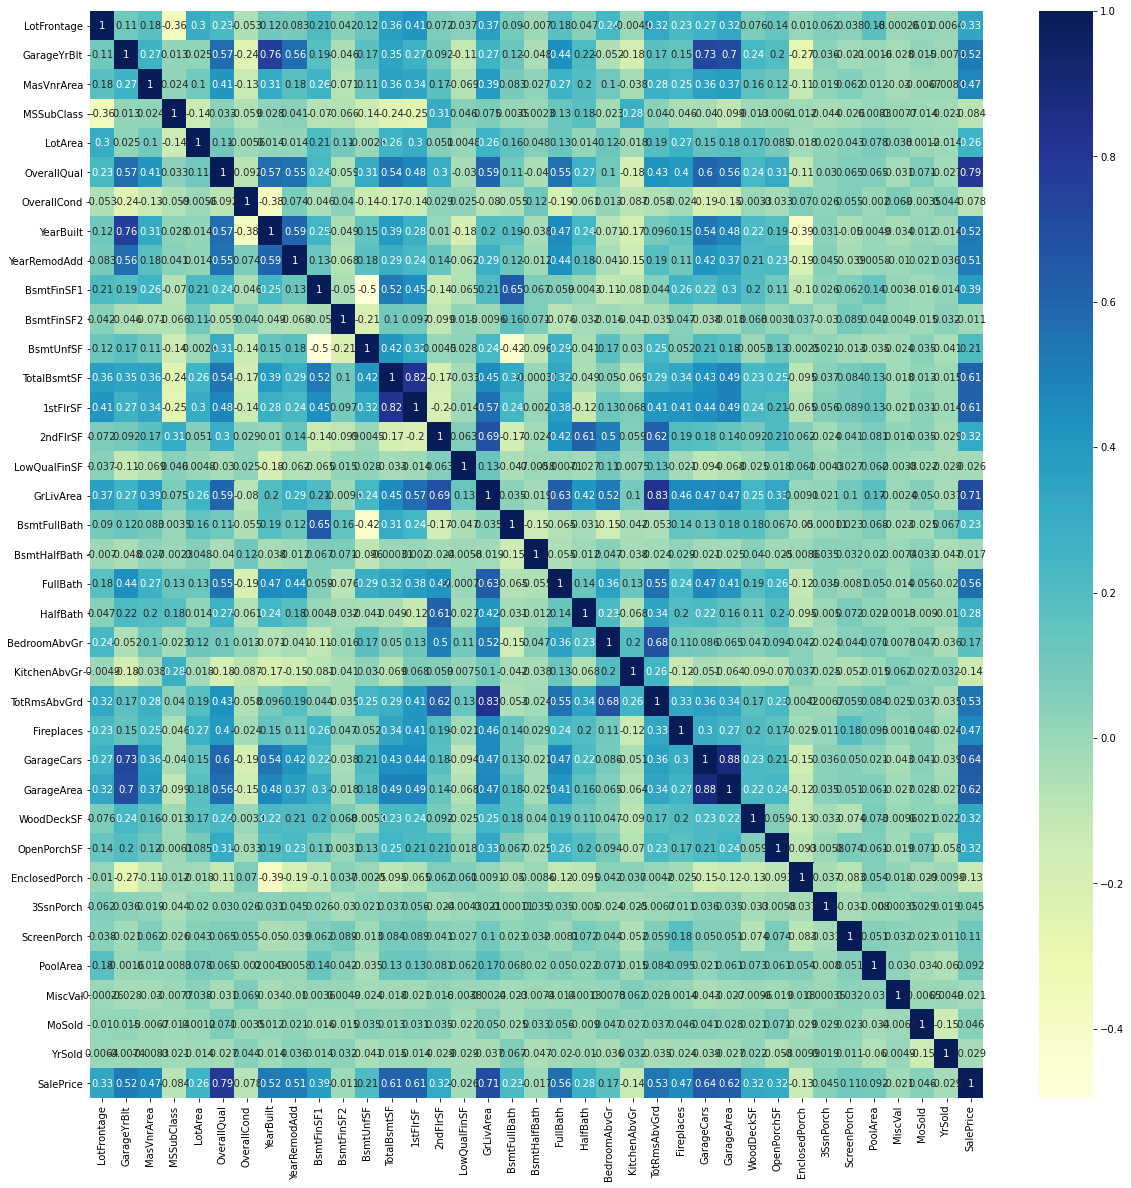

In [214]:
import seaborn as sns
plt.figure(figsize=(20,20))
corr_matrix=df_fill.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu' , annot=True)

In [235]:
#observations

#New features to test out
#SF related features> combine to form 'total_sf' and remove the consitutents - 'TotalBsmtSF','GrLivArea'
#combine bathrooms = from one feature and check for relationship - 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
#check whether breaking out other rooms from totRmsAbvGrd will improve 'TotRmsAbvGrd' , 'BedroomAbvGr
#combineporcharea 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch','WoodDeckSF'

#garagecars and garagearea same thing, dropping garagearea and garagecars tad bid more related to salesprice
#yearremodeled and yearbuilt are same data, removed yearbuild and remove garageyearbuilt as related to prior, plus not meaningfully related to sale price
#garageyrbuilt drop due to correlation with yearremodelled as will get captures in yearremodeled
#MSSubClass is an object
#Other variable based on description and correlation will drop, will focus only on num variables with strong correlation as well as fundemental relationship with saleprice

num_features_drop = ['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageCars','GarageYrBlt', 'YearBuilt', 'MasVnrArea','OverallCond',
                     'LowQualFinSF','Fireplaces','PoolArea','MiscVal','MoSold','YrSold','KitchenAbvGr']
                
num_to_object =['MSSubClass']

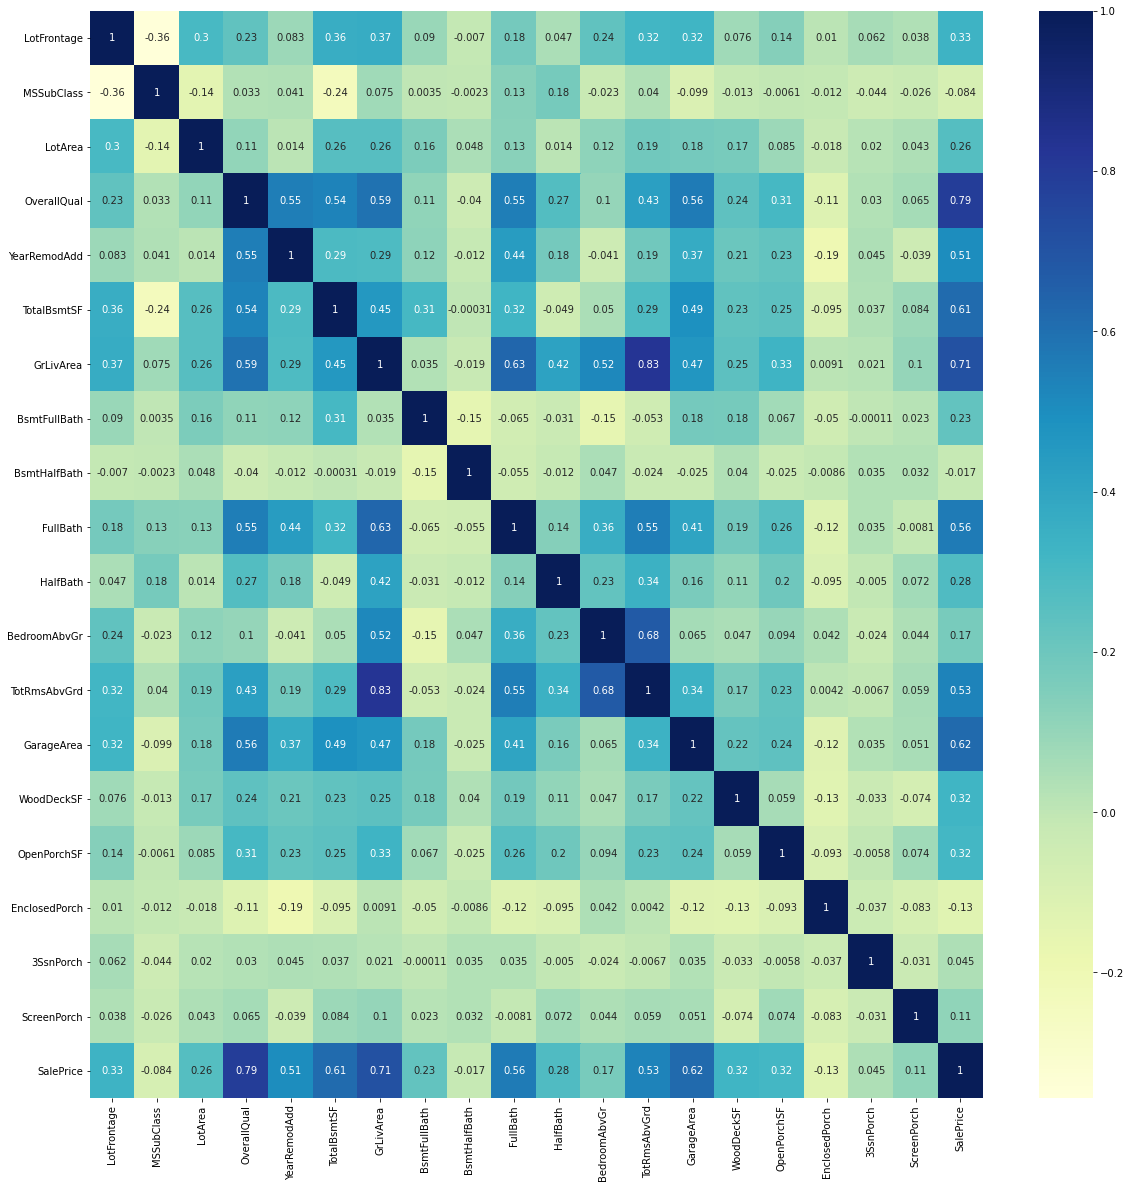

In [236]:
df_cleannum = df_fill.drop(num_features_drop, axis=1)
corr_matrix = df_cleannum.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

Oultlier Detection

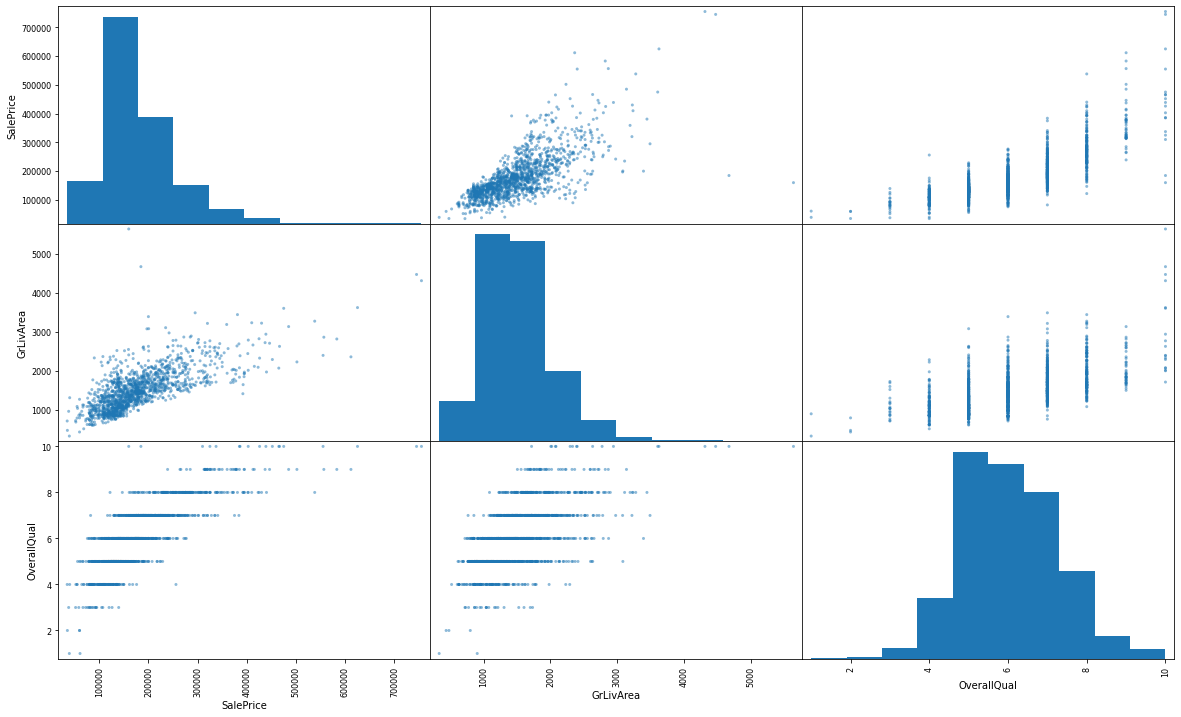

In [241]:
#run scatter plot with a few features highly correlated with SalePrice
from pandas.plotting import scatter_matrix
df_scatter = df_fill[['SalePrice','GrLivArea','OverallQual']]
scatter_matrix(df_scatter,figsize=(20,12))
plt.show()

In [234]:
df_fill[df_fill.GrLivArea>4000]
#524, 1299


,LotFrontage,GarageYrBlt,MasVnrArea,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MasVnrType,Electrical,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,130.0,2007.0,762.0,na,Ex,TA,Gd,GLQ,Unf,Gd,BuiltIn,Fin,TA,TA,na,na,na,Stone,SBrkr,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,2260,0,878,3138,GasA,Ex,Y,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,3,884,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750
692,104.0,1994.0,1170.0,na,Ex,TA,Gd,GLQ,Unf,Ex,Attchd,Fin,TA,TA,na,na,na,BrkFace,SBrkr,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,Ex,TA,PConc,1455,0,989,2444,GasA,Ex,Y,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,3,832,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000
1183,160.0,1996.0,0.0,na,Ex,TA,Av,GLQ,Unf,TA,Attchd,Fin,TA,TA,Ex,MnPrv,na,None,SBrkr,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,Gd,TA,PConc,2096,0,300,2396,GasA,Ex,Y,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,3,813,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000
1299,313.0,2008.0,796.0,na,Ex,TA,Gd,GLQ,Unf,Gd,Attchd,Fin,TA,TA,Gd,na,na,Stone,SBrkr,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Ex,TA,PConc,5644,0,466,6110,GasA,Ex,Y,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,2,1418,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000


In [ ]:
df_new_feat= df.copy()

In [ ]:
df_new_feat.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
#totalsquarefeet
df_new_feat['TotalSF'] = df_new_feat['TotalBsmtSF'] + df_new_feat['1stFlrSF'] + df_new_feat['2ndFlrSF']

In [ ]:
#Garage year build, fill in empty with 1900 [oldest year in dataset] and then get age
df_new_feat['GarageYrBlt'].fillna(1900, inplace=True)
df_new_feat['GarageAge'] = df_new_feat['GarageYrBlt'] - 1900

In [ ]:
#total bath rooms
df_new_feat['TotalBaths'] = df_new_feat['FullBath'] + df_new_feat['HalfBath'] + df_new_feat['BsmtFullBath'] + df_new_feat['BsmtHalfBath']

In [ ]:
corr_matrix = df_new_feat.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.782260
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
TotalBaths       0.613005
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
GarageAge        0.518287
GarageYrBlt      0.518287
YearRemodAdd     0.507101
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorc

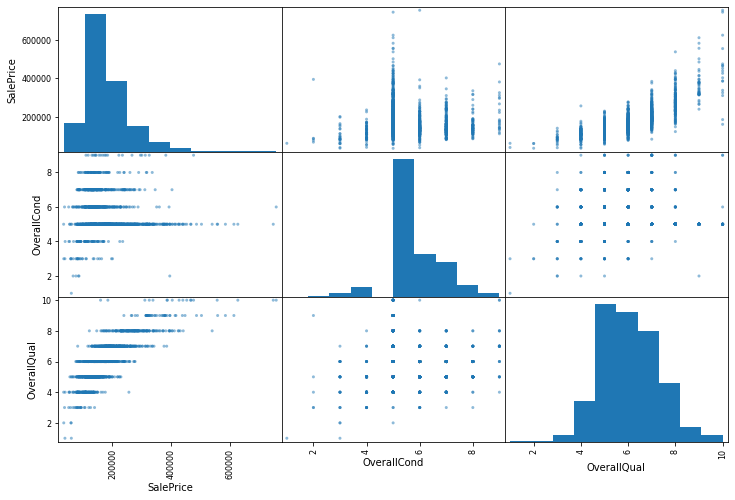

In [ ]:
from pandas.plotting import scatter_matrix
df_scatter = df[['SalePrice', 'OverallCond' , 'OverallQual']]
scatter_matrix(df_scatter, figsize=(12,8))
plt.show()

Defining X & y

In [24]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice'].copy()

In [25]:
X.shape

(1460, 79)

Num and Cat feature list

In [26]:
#column names to pass into pipelines
num_column_list = list(X.select_dtypes('number').columns)
cat_column_list = list(set(X.columns)-set(num_column_list))

Train and test set split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Organization

In [28]:
#ordinal encoding
ordinal = ['Street','Alley','LotShape','LandContour',
           'LotConfig','Neighborhood','BldgType','HouseStyle','RoofStyle',
           'MasVnrType','ExterQual','ExterCond',
           'BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
           'CentralAir','FireplaceQu','GarageType',
           'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC',
           'Fence']

#onehot encoding
one_hot = ['Foundation','BsmtCond','Heating','Electrical', 'RoofMatl','LandSlope','Functional','MiscFeature','Condition1','Condition2', 
           'SaleType', 'SaleCondition','Exterior1st','Exterior2nd','MSZoning','Utilities','KitchenQual',]

In [29]:
ordinal_na = list(set(ordinal) - set(frequent_cat))
ordinal_frequent = list(set(ordinal) - set(ordinal_na))

onehot_na = list(set(one_hot) - set(frequent_cat))
onehot_frequent = list(set(one_hot) - set(onehot_na))

num_frequant = frequent_num
num_constant = constant
num_median = list(set(num_column_list) - set(frequent_num) - set(num_constant))

#setup pipeline with processing as per this sequence of features
num_feature_list = num_frequant + num_constant + num_median

len(ordinal_frequent + ordinal_na + onehot_frequent + onehot_na + num_median + num_frequant + num_constant)== len((X.columns))

True

Creating custom transformers

In [30]:
#custom feature selector
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFeatureSelector(BaseEstimator, TransformerMixin):
  def __init__(self, feature_names):
    self._feature_names=feature_names

  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    return X[self._feature_names]

In [31]:
#setup custom feature addition

totalbsmtsf_ix= X_train[num_feature_list].columns.get_loc('TotalBsmtSF')
firstflrsf_ix= X_train[num_feature_list].columns.get_loc('1stFlrSF')
secondflrsf_ix= X_train[num_feature_list].columns.get_loc('2ndFlrSF')
bsmtfullbath_ix= X_train[num_feature_list].columns.get_loc('BsmtFullBath')
bsmthalfbath_ix= X_train[num_feature_list].columns.get_loc('BsmtHalfBath')
fullbath_ix= X_train[num_feature_list].columns.get_loc('FullBath')
halfbath_ix= X_train[num_feature_list].columns.get_loc('HalfBath')
bedroomAbvGr_ix = X_train[num_feature_list].columns.get_loc('BedroomAbvGr')
totRmsAbvGrd_ix = X_train[num_feature_list].columns.get_loc('TotRmsAbvGrd')


class CustomFeatureAddition(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    totalSF = X[:, totalbsmtsf_ix] + X[:,firstflrsf_ix] + X[:, secondflrsf_ix]
    totalbaths = X[:, bsmtfullbath_ix] + X[:, bsmthalfbath_ix] + X[:, fullbath_ix] + X[:,halfbath_ix]
    otherrooms = X[:, totRmsAbvGrd_ix] - X[:, bedroomAbvGr_ix]
    X=np.delete(X, [totalbsmtsf_ix, firstflrsf_ix, secondflrsf_ix, bsmtfullbath_ix, bsmthalfbath_ix, fullbath_ix, halfbath_ix, totRmsAbvGrd_ix ] , axis=1)
    return np.c_[X, totalSF, totalbaths, otherrooms]    

Setting up pipelines

In [32]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [33]:
#pipelines for categrocial features
catConstant_ordinaltransformer = Pipeline([('fill_NanOrdConstant', SimpleImputer(strategy='constant', fill_value='na')),
                                           ('ordinalConstant_encode', OrdinalEncoder())])
catConstant_onehottransformer = Pipeline([('fill_NanOneConstant', SimpleImputer(strategy='constant',fill_value='na')),
                                          ('oneHotConstant_encode', OneHotEncoder(handle_unknown='ignore'))])
catFrequent_ordinaltransformer = Pipeline([('fill_NanOrdFrequent', SimpleImputer(strategy='most_frequent')),
                                           ('ordinalFrequent_encoder', OrdinalEncoder())])
catFreqeunt_onehottransformer = Pipeline([('fill_NanOneFrequent', SimpleImputer(strategy='most_frequent')),
                                          ('oneHotFreqeunt_encode', OneHotEncoder(handle_unknown='ignore'))])

#column transformer for categorical features
cat_transformer = ColumnTransformer([('constant_ordinal', catConstant_ordinaltransformer, ordinal_na),
                                     ('constant_onehot', catConstant_onehottransformer,onehot_na),
                                     ('frequent_ordinal', catFrequent_ordinaltransformer, ordinal_frequent),
                                     ('frequent_onehot',  catFreqeunt_onehottransformer, onehot_frequent)])
                                     

#numrtical transformer
num_transformer = ColumnTransformer([('frequent_impute', SimpleImputer(strategy='most_frequent'), num_frequant),
                            ('constant_num', SimpleImputer(strategy='constant', fill_value=1900), num_constant),
                            ('median_num', SimpleImputer(strategy='median'), num_median)])

#cat_pipeline & num pipeline
cat_pipeline = Pipeline([('cat_column_selection', CustomFeatureSelector(cat_column_list)),
                         ('cat_transformer', cat_transformer),
                         ('std_cat', StandardScaler())])

num_pipeline = Pipeline([('num_column_selection', CustomFeatureSelector(num_feature_list)),
                        ('num_tranformer', num_transformer),
                        ('custom_features', CustomFeatureAddition()),
                        ('std_num', StandardScaler())])

#combining pipeline
pre_process = FeatureUnion([('cat_pipeline', cat_pipeline),
                            ('num_pipeline', num_pipeline)])

Pre_processing the Training and Test Set

In [34]:
#fitting to full training - missing categorical vairable, can't initiate 'ignore' as dropping first columsn in onehot encoding to avoid multicolenearity
X_prepared_train = pre_process.fit_transform(X_train)
X_prepared_test = pre_process.transform(X_test)

# Checking to ensure shapes of processed train and test set is equal due to uneven spread of cat data between test and training set
X_prepared_train.shape[1] == X_prepared_test.shape[1]
X_prepared_train.shape[1]

171

Feature Selection

In [35]:
#getting full feature list 

import itertools

no_contantOH_features = len(list(cat_pipeline.named_steps['cat_transformer'].named_transformers_['constant_onehot'].named_steps['oneHotConstant_encode'].categories_))

#drop first is initiated in onehot encoding, removed the first column in onehot features for each encoded category
constant_onehot_features = []
for i in range(0, no_contantOH_features):
  oh_feat = (list(cat_pipeline.named_steps['cat_transformer'].named_transformers_['constant_onehot'].named_steps['oneHotConstant_encode'].categories_[i]))
  constant_onehot_features.append(oh_feat)

constant_onehot_features = list(itertools.chain.from_iterable(constant_onehot_features))
frequent_onehot_features = list(cat_pipeline.named_steps['cat_transformer'].named_transformers_['frequent_onehot'].named_steps['oneHotFreqeunt_encode'].categories_[0])
new_features = ['total_sf', 'total_baths','otherrooms']
feature_list = ordinal_na + constant_onehot_features + ordinal_frequent + frequent_onehot_features + num_frequant + num_constant + num_median + new_features
engineered_feat = ['TotalBsmtSF','1stFlrSF','1stFlrSF','2ndFlrSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd']
final_feature_list = [feature for feature in feature_list if feature not in engineered_feat]
len(final_feature_list)

171

In [36]:
concat_Xprep_y = np.c_[X_prepared_train, y_train.values]
columns_list = final_feature_list
columns_list.append('SalePrice')
prepared_df = pd.DataFrame(concat_Xprep_y, columns=columns_list)

In [37]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [38]:
# check features
prepared_df.head(5)

,BsmtFinType1,BsmtExposure,PavedDrive,GarageQual,FireplaceQu,RoofStyle,Street,BldgType,BsmtQual,PoolQC,GarageType,GarageFinish,LotConfig,Fence,HeatingQC,ExterCond,CentralAir,Alley,LandContour,BsmtFinType2,HouseStyle,GarageCond,ExterQual,LotShape,Neighborhood,C (all),FV,RH,RL,RM,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,Abnorml,AdjLand,Alloca,Family,Normal,Partial,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Ex,Fa,Gd,TA,Maj1,Maj2,Min1,Min2,Mod,Typ,Artery,Feedr,Norm,PosA,PosN,RRAe,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,BrkTil,CBlock,PConc,Slab,Stone,Wood,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AllPub,NoSeWa,Fa,Gd,Po,TA,na,Gar2,Othr,Shed,na,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,Gtl,Mod,Sev,Floor,GasA,GasW,Grav,OthW,Wall,MasVnrType,FuseA,FuseF,FuseP,Mix,SBrkr,MasVnrArea,GarageYrBlt,LowQualFinSF,MiscVal,GarageCars,OpenPorchSF,BedroomAbvGr,LotFrontage,OverallQual,WoodDeckSF,KitchenAbvGr,BsmtFinSF2,GrLivArea,MSSubClass,YrSold,GarageArea,BsmtFinSF1,LotArea,BsmtUnfSF,OverallCond,PoolArea,YearRemodAdd,MoSold,YearBuilt,EnclosedPorch,3SsnPorch,Fireplaces,ScreenPorch,total_sf,total_baths,otherrooms,SalePrice
0,-0.443789,-2.001604,0.299012,0.123488,-1.299575,1.859494,0.065568,-0.405373,-2.597159,0.052959,-0.766585,0.819963,0.595580,0.444574,-0.887472,0.364210,0.267506,0.240947,0.305734,0.28238,-0.54303,0.094046,-3.720567,0.758719,0.618148,-0.088121,-0.209258,-0.114059,0.517868,-0.41839,0.138554,-0.029273,-0.029273,-0.029273,-0.088121,-0.065568,-0.065568,-0.269339,-0.050746,-0.077648,-0.101885,-2.206660,3.304295,-0.167836,-0.236765,0.385326,-0.077648,-0.121531,-0.092928,-0.121531,-0.041416,-0.058621,-0.267506,-0.167836,1.236179,-1.020763,-0.097506,-0.050746,-0.144841,-0.162364,-0.101885,0.271163,-0.029273,-0.058621,0.083045,-0.029273,-0.029273,-0.029273,-0.170514,-0.029273,-0.029273,-0.077648,-0.058621,-0.065568,3.341656,-0.041416,-2.615134,-0.346189,-0.872748,1.131923,-0.128593,-0.071858,-0.029273,-0.117851,-0.029273,-0.029273,-0.193133,-0.029273,4.728636,-0.414143,-0.029273,-0.404162,-0.295843,-0.041416,-0.121531,-0.738223,-0.419802,-0.135309,0.029273,-0.029273,-0.180871,-0.222297,-0.041416,0.341518,-0.156721,-0.041416,-0.041416,-0.200178,0.209258,-0.125109,-0.029273,-0.065568,-0.135309,-0.029273,4.728636,-0.39841,-0.083045,-0.39841,-0.029273,-0.343079,-0.058621,-0.117851,-0.723060,-0.411302,-0.162364,0.248633,-0.222297,-0.106092,-0.029273,0.147893,-0.106092,-0.077648,-0.041416,-0.041416,-1.281382,-0.274784,-0.138554,-0.041416,-0.029273,0.317566,1.914933,1.106321,-0.125918,-0.092588,1.683633,0.874116,0.146285,0.987831,2.131506,-0.742575,-0.203898,-0.291823,0.601886,-0.868365,-0.613562,1.434743,-0.901062,0.103212,2.757198,-0.513041,-0.058085,1.078914,0.256396,1.188032,-0.364703,-0.115333,0.605438,4.546911,1.396715,-0.470727,1.905092,314813.0
1,1.156043,0.590274,0.299012,0.123488,0.851445,1.859494,0.065568,-0.405373,0.768390,0.052959,1.314463,0.819963,0.595580,0.444574,0.263630,0.364210,-3.738229,0.240947,0.305734,0.28238,-0.54303,0.094046,0.661573,0.758719,-0.046980,-0.088121,-0.209258,-0.114059,0.517868,-0.41839,0.138554,-0.029273,-0.029273,-0.029273,-0.088121,-0.065568,-0.065568,-0.269339,-0.050746,-0.077648,-0.101885,0.453174,-0.302636,-0.167836,-0.236765,-2.595207,-0.077648,8.228358,-0.092928,-0.121531,-0.041416,-0.058621,-0.267506,-0.167836,-0.808944,0.979659,-0.097506,-0.050746,-0.144841,-0.162364,-0.101885,0.271163,-0.029273,-0.058621,0.083045,-0.029273,-0.029273,-0.029273,-0.170514,-0.029273,-0.029273,-0.077648,-0.058621,-0.065568,-0.299253,-0.041416,0.382390,-0.346189,1.145806,-0.883452,-0.128593,-0.071858,-0.029273,-0.117851,-0.029273,-0.029273,-0.193133,-0.029273,-0.211477,-0.414143,-0.029273,2.474258,-0.295843,-0.041416,-0.121531,-0.738223,-0.419802,-0.135309,0.029273,-0.029273,-0.180871,-0.222297,-0.041416,0.341518,-0.156721,-0.041416,-0.041416,-0.200178,0.

In [39]:
import seaborn as sns

prepared_correlation_matrix = prepared_df.corr()
prepared_correlation_matrix['SalePrice'].sort_values(ascending=False)
# plt.figure(figsize=(120,120))
# corr_matrix_threshold = prepared_df.corr()
# matrx = sns.heatmap(corr_matrix_threshold[corr_matrix_threshold>=0.65], annot=True, cmap="RdYlGn", )

SalePrice        1.000000
total_sf         0.816362
OverallQual      0.790636
GrLivArea        0.721707
GarageCars       0.660927
GarageArea       0.646603
total_baths      0.627703
otherrooms       0.598881
GarageYrBlt      0.529070
YearBuilt        0.521242
YearRemodAdd     0.517822
PConc            0.506890
MasVnrArea       0.487600
Ex               0.485208
Fireplaces       0.470320
BsmtFinSF1       0.401390
New              0.378652
Partial          0.375768
LotFrontage      0.340633
Gd               0.340128
VinylSd          0.337466
VinylSd          0.335563
OpenPorchSF      0.320193
WoodDeckSF       0.311813
CentralAir       0.254876
RL               0.253565
LotArea          0.252766
SBrkr            0.248857
PavedDrive       0.245075
RoofStyle        0.223850
BsmtUnfSF        0.206736
Neighborhood     0.190791
HouseStyle       0.187186
BedroomAbvGr     0.182258
WdShngl          0.175892
Fence            0.142726
Typ              0.141352
Alley            0.139006
CmentBd     

In [40]:
prepared_correlation_matrix = prepared_df.corr().abs()
prepared_correlation_matrix = prepared_correlation_matrix[prepared_correlation_matrix>=.5]
prepared_correlation_matrix = prepared_correlation_matrix.unstack()
prepared_correlation_matrix = prepared_correlation_matrix.sort_values(ascending=False).drop_duplicates()
prepared_correlation_matrix

SalePrice     SalePrice       1.000000
New           Partial         0.988820
CmentBd       CemntBd         0.979106
VinylSd       VinylSd         0.971913
MetalSd       MetalSd         0.971433
Shed          na              0.956607
Mod           Gtl             0.894078
MiscVal       Gar2            0.892016
GarageCars    GarageArea      0.887174
AsbShng       AsbShng         0.882194
HdBoard       HdBoard         0.870440
total_sf      GrLivArea       0.868007
SBrkr         FuseA           0.865282
PoolQC        PoolArea        0.857074
Wd Sdng       Wd Sdng         0.857009
Gd            TA              0.825741
na            Slab            0.820522
SalePrice     total_sf        0.816362
RL            RM              0.807910
SalePrice     OverallQual     0.790636
Stucco        Stucco          0.785213
WD            New             0.782586
              Partial         0.782178
PConc         CBlock          0.771031
YearBuilt     GarageYrBlt     0.769127
Plywood       Plywood    

Finalization of Features and final data preparation for model testing

In [41]:
#dropping due to multicolinearity
drop_list = ['SaleType','RoofStyle','GarageArea','PoolQC','GrLivArea','Exterior1st','FireplaceQu','GarageYrBlt','GrLivArea',
             'BsmtFinSF1','BsmtFinSF2', 'YearBuilt', 'LandSlope']
X_clean = X.drop(drop_list, axis=1)

In [42]:
ordinal_frequent = list(set(ordinal_frequent) - set(drop_list)) 
ordinal_na = list(set(ordinal_na) - set(drop_list))
onehot_frequent = list(set(onehot_frequent) - set(drop_list))
onehot_na = list(set(onehot_na) - set(drop_list))
num_median = list(set(num_median) - set(drop_list))
num_frequant = list(set(num_frequant) - set(drop_list))
num_constant = list(set(num_constant) - set(drop_list))

len(ordinal_frequent + ordinal_na + onehot_frequent + onehot_na + num_median + num_frequant + num_constant)== len((X_clean.columns))

True

In [43]:
num_feature_list = num_frequant + num_constant + num_median
cat_column_list = list(set(X_clean.columns) - set(num_feature_list))
len(X_clean.columns) == len(num_feature_list) + len(cat_column_list)

True

In [44]:
#setup custom feature addition

totalbsmtsf_ix= X_train[num_feature_list].columns.get_loc('TotalBsmtSF')
firstflrsf_ix= X_train[num_feature_list].columns.get_loc('1stFlrSF')
secondflrsf_ix= X_train[num_feature_list].columns.get_loc('2ndFlrSF')
bsmtfullbath_ix= X_train[num_feature_list].columns.get_loc('BsmtFullBath')
bsmthalfbath_ix= X_train[num_feature_list].columns.get_loc('BsmtHalfBath')
fullbath_ix= X_train[num_feature_list].columns.get_loc('FullBath')
halfbath_ix= X_train[num_feature_list].columns.get_loc('HalfBath')
bedroomAbvGr_ix = X_train[num_feature_list].columns.get_loc('BedroomAbvGr')
totRmsAbvGrd_ix = X_train[num_feature_list].columns.get_loc('TotRmsAbvGrd')


class CustomFeatureAddition(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    totalSF = X[:, totalbsmtsf_ix] + X[:,firstflrsf_ix] + X[:, secondflrsf_ix]
    totalbaths = X[:, bsmtfullbath_ix] + X[:, bsmthalfbath_ix] + X[:, fullbath_ix] + X[:,halfbath_ix]
    otherrooms = X[:, totRmsAbvGrd_ix] - X[:, bedroomAbvGr_ix]
    X=np.delete(X, [totalbsmtsf_ix, firstflrsf_ix, secondflrsf_ix, bsmtfullbath_ix, bsmthalfbath_ix, fullbath_ix, halfbath_ix, totRmsAbvGrd_ix ] , axis=1)
    return np.c_[X, totalSF, totalbaths, otherrooms]

In [45]:
#pipelines for categrocial features
catConstant_ordinaltransformer = Pipeline([('fill_NanOrdConstant', SimpleImputer(strategy='constant', fill_value='na')),
                                           ('ordinalConstant_encode', OrdinalEncoder())])
catConstant_onehottransformer = Pipeline([('fill_NanOneConstant', SimpleImputer(strategy='constant',fill_value='na')),
                                          ('oneHotConstant_encode', OneHotEncoder(handle_unknown='ignore'))])
catFrequent_ordinaltransformer = Pipeline([('fill_NanOrdFrequent', SimpleImputer(strategy='most_frequent')),
                                           ('ordinalFrequent_encoder', OrdinalEncoder())])
catFreqeunt_onehottransformer = Pipeline([('fill_NanOneFrequent', SimpleImputer(strategy='most_frequent')),
                                          ('oneHotFreqeunt_encode', OneHotEncoder(handle_unknown='ignore'))])

#column transformer for categorical features
cat_transformer = ColumnTransformer([('constant_ordinal', catConstant_ordinaltransformer, ordinal_na),
                                     ('constant_onehot', catConstant_onehottransformer,onehot_na),
                                     ('frequent_ordinal', catFrequent_ordinaltransformer, ordinal_frequent),
                                     ('frequent_onehot',  catFreqeunt_onehottransformer, onehot_frequent)])
                                     

#numrtical transformer
num_transformer = ColumnTransformer([('frequent_impute', SimpleImputer(strategy='most_frequent'), num_frequant),
                            ('constant_num', SimpleImputer(strategy='constant', fill_value=1900), num_constant),
                            ('median_num', SimpleImputer(strategy='median'), num_median)])

#cat_pipeline & num pipeline
cat_pipeline = Pipeline([('cat_column_selection', CustomFeatureSelector(cat_column_list)),
                         ('cat_transformer', cat_transformer),
                         ('std_cat', StandardScaler())])

num_pipeline = Pipeline([('num_column_selection', CustomFeatureSelector(num_feature_list)),
                        ('num_tranformer', num_transformer),
                        ('custom_features', CustomFeatureAddition()),
                        ('std_num', StandardScaler())])

#combining pipeline
pre_process = FeatureUnion([('cat_pipeline', cat_pipeline),
                            ('num_pipeline', num_pipeline)])

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_clean, y, test_size=.2, random_state=0)

In [47]:
X_prepared_train = pre_process.fit_transform(X_train)
X_prepared_test = pre_process.transform(X_val)
X_prepared = pre_process.transform(X_clean)

In [48]:
X_prepared_test.shape

(292, 135)

In [49]:
#getting full feature list 

import itertools

no_contantOH_features = len(list(cat_pipeline.named_steps['cat_transformer'].named_transformers_['constant_onehot'].named_steps['oneHotConstant_encode'].categories_))

#drop first is initiated in onehot encoding, removed the first column in onehot features for each encoded category
constant_onehot_features = []
for i in range(0, no_contantOH_features):
  oh_feat = (list(cat_pipeline.named_steps['cat_transformer'].named_transformers_['constant_onehot'].named_steps['oneHotConstant_encode'].categories_[i]))
  constant_onehot_features.append(oh_feat)

constant_onehot_features = list(itertools.chain.from_iterable(constant_onehot_features))
frequent_onehot_features = list(cat_pipeline.named_steps['cat_transformer'].named_transformers_['frequent_onehot'].named_steps['oneHotFreqeunt_encode'].categories_[0])
new_features = ['total_sf', 'total_baths','otherrooms']
feature_list = ordinal_na + constant_onehot_features + ordinal_frequent + frequent_onehot_features + num_frequant + num_constant + num_median + new_features
engineered_feat = ['TotalBsmtSF','1stFlrSF','1stFlrSF','2ndFlrSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd']
final_feature_list = [feature for feature in feature_list if feature not in engineered_feat]
len(final_feature_list)

135

In [50]:
concat_Xprep_y = np.c_[X_prepared_train, y_train.values]
columns_list = final_feature_list
columns_list.append('SalePrice')
prepared_df = pd.DataFrame(concat_Xprep_y, columns=columns_list)
prepared_df.head(5)

,BsmtExposure,GarageQual,Street,GarageType,LotConfig,HeatingQC,CentralAir,Alley,BsmtFinType2,HouseStyle,GarageCond,ExterQual,Neighborhood,BsmtFinType1,PavedDrive,GarageFinish,Fence,ExterCond,LandContour,BldgType,BsmtQual,LotShape,C (all),FV,RH,RL,RM,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AllPub,NoSeWa,Abnorml,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,na,Gar2,Othr,Shed,na,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Ex,Fa,Gd,TA,Maj1,Maj2,Min1,Min2,Mod,Typ,Artery,Feedr,Norm,PosA,PosN,RRAe,BrkTil,CBlock,PConc,Slab,Stone,Wood,Floor,GasA,GasW,Grav,OthW,Wall,MasVnrType,FuseA,FuseF,FuseP,Mix,SBrkr,MasVnrArea,LowQualFinSF,MiscVal,GarageCars,OpenPorchSF,BedroomAbvGr,LotFrontage,OverallQual,WoodDeckSF,KitchenAbvGr,MSSubClass,YrSold,LotArea,BsmtUnfSF,OverallCond,PoolArea,YearRemodAdd,MoSold,EnclosedPorch,3SsnPorch,Fireplaces,ScreenPorch,total_sf,total_baths,otherrooms,SalePrice
0,-2.001604,0.123488,0.065568,-0.766585,0.595580,-0.887472,0.267506,0.240947,0.28238,-0.54303,0.094046,-3.720567,0.618148,-0.443789,0.299012,0.819963,0.444574,0.364210,0.305734,-0.405373,-2.597159,0.758719,-0.088121,-0.209258,-0.114059,0.517868,-0.41839,0.138554,-0.029273,-0.029273,-0.029273,-0.088121,-0.065568,-0.065568,0.029273,-0.029273,-0.269339,-0.050746,-0.077648,-0.101885,-2.206660,3.304295,-0.180871,-0.222297,-0.041416,0.341518,-0.156721,-0.041416,-0.041416,-0.200178,0.209258,-0.125109,-0.029273,-0.065568,-0.135309,-0.029273,4.728636,-0.39841,-0.083045,-0.39841,-0.029273,-0.343079,-0.058621,-0.117851,-0.723060,-0.411302,-0.162364,-0.167836,-0.236765,0.385326,-0.077648,-0.121531,-0.092928,-0.121531,-0.041416,-0.058621,-0.267506,-0.167836,1.236179,-1.020763,-0.097506,-0.050746,-0.144841,-0.162364,-0.101885,0.271163,-0.029273,-0.058621,0.083045,-0.029273,-0.029273,-0.029273,-0.346189,-0.872748,1.131923,-0.128593,-0.071858,-0.029273,-0.029273,0.147893,-0.106092,-0.077648,-0.041416,-0.041416,-1.281382,-0.274784,-0.138554,-0.041416,-0.029273,0.317566,1.914933,-0.125918,-0.092588,1.683633,0.874116,0.146285,0.987831,2.131506,-0.742575,-0.203898,-0.868365,-0.613562,0.103212,2.757198,-0.513041,-0.058085,1.078914,0.256396,-0.364703,-0.115333,0.605438,4.546911,1.396715,-0.470727,1.905092,314813.0
1,0.590274,0.123488,0.065568,1.314463,0.595580,0.263630,-3.738229,0.240947,0.28238,-0.54303,0.094046,0.661573,-0.046980,1.156043,0.299012,0.819963,0.444574,0.364210,0.305734,-0.405373,0.768390,0.758719,-0.088121,-0.209258,-0.114059,0.517868,-0.41839,0.138554,-0.029273,-0.029273,-0.029273,-0.088121,-0.065568,-0.065568,0.029273,-0.029273,-0.269339,-0.050746,-0.077648,-0.101885,0.453174,-0.302636,-0.180871,-0.222297,-0.041416,0.341518,-0.156721,-0.041416,-0.041416,-0.200178,0.209258,-0.125109,-0.029273,-0.065568,-0.135309,-0.029273,-0.211477,-0.39841,-0.083045,2.50998,-0.029273,-0.343079,-0.058621,-0.117851,-0.723060,-0.411302,-0.162364,-0.167836,-0.236765,-2.595207,-0.077648,8.228358,-0.092928,-0.121531,-0.041416,-0.058621,-0.267506,-0.167836,-0.808944,0.979659,-0.097506,-0.050746,-0.144841,-0.162364,-0.101885,0.271163,-0.029273,-0.058621,0.083045,-0.029273,-0.029273,-0.029273,-0.346189,1.145806,-0.883452,-0.128593,-0.071858,-0.029273,-0.029273,0.147893,-0.106092,-0.077648,-0.041416,-0.041416,0.345416,-0.274784,-0.138554,-0.041416,-0.029273,0.317566,-0.564793,-0.125918,-0.092588,-1.057111,-0.700461,-1.100873,-0.457956,-0.794852,-0.742575,-0.203898,-0.868365,0.884118,-0.372881,0.745229,-0.513041,-0.058085,-1.097548,0.623394,-0.364703,-0.115333,-0.955603,-0.269109,-1.002330,-1.570346,-0.539230,109500.0
2,0.590274,0.123488,0.065568,1.314463,0.595580,-0.887472,0.267506,-4.970639,0.28238,-0.54303,0.094046,0.661573,-1.044672,-1.510344,0.299012,0.819963,0.444574,-2.328178,-2.574085,-0.405373,-0.353459,-1.359648,-0.088121,-0.209258,-0.114059,0.517868,-0.41839,0.138554,-0.029273,-0.029273,-0.029273,-0.088121,-0.065568,-0.065568,0.029273,-0.02927

MODEL BUILDING AND TESTING

In [51]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
np.set_printoptions(precision=3)

In [52]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [53]:
def rmse_model(y_train, y_pred):
  mse = mean_squared_error(y_train, y_pred)
  rmse = np.sqrt(mse)
  return rmse

In [54]:
def crossvalscores(model, X, y, cv):
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',cv=cv)
  scores = np.sqrt(-scores)
  print('Scores : ', scores)
  print('Mean : ', scores.mean())
  print('StdD : ', scores.std())

In [55]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

ElasticNet

In [56]:
from sklearn.linear_model import ElasticNet
enet_reg = ElasticNet(l1_ratio=1)
enet_reg.fit(X_prepared_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16869400997.101807, tolerance: 719132949.923008
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
y_pred = enet_reg.predict(X_prepared_train)

In [58]:
rmse_model(y_train, y_pred)

22388.19745921798

In [59]:
crossvalscores(enet_reg, X_prepared_train, y_train, 20)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16817898742.480835, tolerance: 697356736.1235611
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19433573156.700073, tolerance: 678451910.0876664
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16977840034.559875, tolerance: 674653566.5998566
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178783407

Scores :  [18598.37 25843.24 30495.69 20546.17 34536.34 63967.51 30244.72 32184.65
 23201.90 22767.57 23325.29 30760.37 37789.04 20019.80 21351.00 32946.23
 20958.29 19806.39 22821.90 21687.87]
Mean :  27692.616560133716
StdD :  10008.267905162067


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17835965321.49756, tolerance: 686574882.3353577
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8592765620.1875, tolerance: 697556952.5603338
  positive)


SVR

In [60]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_prepared_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [61]:
y_pred= svr_reg.predict(X_prepared_train)

In [62]:
rmse_model(y_train, y_pred)

80428.75264807847

In [63]:
crossvalscores(svr_reg, X_prepared_train, y_train, 10)

Scores :  [74259.10 83240.20 83184.71 82745.92 89795.50 82137.79 93684.95 78640.12
 64741.60 68382.87]
Mean :  80081.27419586005
StdD :  8476.431551921803


Decision Tree Model

In [64]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=8)

In [65]:
tree_reg.fit(X_prepared_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [66]:
tree_rmse = np.sqrt(mean_squared_error(y_train, tree_reg.predict(X_prepared_train)))
tree_rmse

13369.569401961298

In [67]:
crossvalscores(tree_reg, X_prepared_train, y_train, 10)

Scores :  [41754.29 35314.62 42450.26 33088.57 43423.83 38698.47 37557.01 33827.20
 32107.34 28718.56]
Mean :  36694.01481129203
StdD :  4653.598069398653


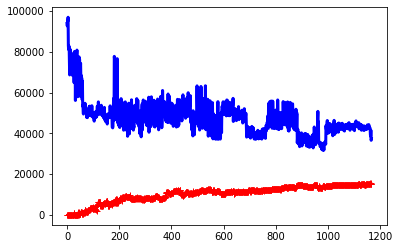

In [68]:
plot_learning_curves(tree_reg, X_prepared, y)

Random Forests

In [69]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [70]:
forest_reg.fit(X_prepared_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
y_pred = forest_reg.predict(X_prepared_train)

In [72]:
rmse_model(y_train, y_pred)

10826.135997053121

In [73]:
crossvalscores(forest_reg, X_prepared_train, y_train, 10)

Scores :  [24733.66 25031.79 44358.11 29450.26 27049.51 24684.88 34383.08 25500.31
 20424.42 19320.06]
Mean :  27493.60821757549
StdD :  6915.362163445249


XG Boost

In [74]:
from xgboost import XGBRFRegressor
xgb_reg = XGBRFRegressor()

In [75]:
xgb_reg.fit(X_prepared_train, y_train)

[05:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [76]:
y_pred = xgb_reg.predict(X_prepared_train)

In [77]:
rmse_model(y_train, y_pred)

33942.764663533286

In [78]:
crossvalscores(xgb_reg, X_prepared_train, y_train, 10)

[05:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GradientBoosRegressor

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor(random_state=0)

In [80]:
gbr_reg.fit(X_prepared_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
y_pred = gbr_reg.predict(X_prepared_train)

In [82]:
rmse_model(y_train, y_pred)

13929.050580175093

In [83]:
crossvalscores(gbr_reg, X_prepared_train, y_train, 10)

Scores :  [21334.56 22925.47 50549.13 26716.85 25451.19 24046.92 31173.08 23500.05
 20254.24 20090.98]
Mean :  26604.24585045429
StdD :  8577.867210612236


In [84]:
y_test_pred = gbr_reg.predict(X_prepared_test)
rmse_model(y_val, y_test_pred)

31278.353049089983

Select - Gradient Boost

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid = [{'n_estimators':[135,137,140], 'max_depth':[4,5,6]}]

In [87]:
grid_search = GridSearchCV(gbr_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', return_train_score=True)

In [88]:
grid_search.fit(X_prepared_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [89]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
  print(np.sqrt(-mean_score), params)

27904.49668895287 {'max_depth': 4, 'n_estimators': 135}
27908.36877544275 {'max_depth': 4, 'n_estimators': 137}
27900.35984368087 {'max_depth': 4, 'n_estimators': 140}
28962.72158985087 {'max_depth': 5, 'n_estimators': 135}
28969.09668028632 {'max_depth': 5, 'n_estimators': 137}
28973.471175714716 {'max_depth': 5, 'n_estimators': 140}
28778.97451093872 {'max_depth': 6, 'n_estimators': 135}
28781.776015629115 {'max_depth': 6, 'n_estimators': 137}
28772.72254954253 {'max_depth': 6, 'n_estimators': 140}


In [90]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 140}

In [91]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [92]:
sorted(zip(feature_importances, final_feature_list), reverse=True)

[(0.4340191614177241, 'total_sf'),
 (0.34033696879672753, 'OverallQual'),
 (0.025113133854502232, 'total_baths'),
 (0.020204832750189885, 'BsmtQual'),
 (0.01897812136315639, 'LotArea'),
 (0.017371399867059302, 'MasVnrArea'),
 (0.015609129357723605, 'YearRemodAdd'),
 (0.01496958544365961, 'GarageCars'),
 (0.012803777566174443, 'BsmtUnfSF'),
 (0.009580810160879296, 'OverallCond'),
 (0.006931025234091029, 'GarageFinish'),
 (0.006814093350756593, 'OpenPorchSF'),
 (0.0059036101407440155, 'Fireplaces'),
 (0.005090909719086674, 'ExterQual'),
 (0.004873000842297535, 'MoSold'),
 (0.004831455643261912, 'Neighborhood'),
 (0.00444085681693401, 'KitchenAbvGr'),
 (0.004117963135534217, 'LotFrontage'),
 (0.0035085493038675476, 'TA'),
 (0.003423038854572157, 'Ex'),
 (0.0033341600536580126, 'CentralAir'),
 (0.0030490967087441635, 'LotShape'),
 (0.002936518419422088, 'WoodDeckSF'),
 (0.0024313475872022924, 'otherrooms'),
 (0.002362794430601719, 'Norm'),
 (0.0022170398844863497, 'BsmtFinType1'),
 (0.0017

In [93]:
final_model = grid_search.best_estimator_

In [94]:
y_test_pred = final_model.predict(X_prepared_test)
rmse_model(y_val, y_test_pred)

30421.665774094927

Predicting on the test set

In [95]:
# #read test set for final prediction
# X_testset = pd.read_csv('test.csv')
# X_testset.shape

# #drop redundent columns set index to ID
# X_testset.drop(drop_list, axis=1, inplace=True)
# X_testset.shape
# X_testset.set_index('Id', inplace=True)

# #preprocess
# X_prepared_testset = pre_process.transform(X_testset)

# #predict
# y_testset_pred = final_model.predict(X_prepared_testset)

# #prepare result and write to CSV
# y_testset_predreshape = np.reshape(y_testset_pred, (len(y_testset_pred),1))
# y_testset_preddf = pd.DataFrame(y_testset_predreshape, columns=['SalePrice'])
# y_testset_preddf.set_index(X_testset.index)
# y_testset_preddf.to_csv('test_submission.csv')